# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [14]:
reg = smf.ols("tip_pct ~ net_bill + np.power(net_bill,2)", data=tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     8.228
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           0.000361
Time:                        20:24:43   Log-Likelihood:                -4552.1
No. Observations:                 217   AIC:                             9110.
Df Residuals:                     214   BIC:                             9120.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.477e+

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.06e-09
Time:                        20:20:46   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

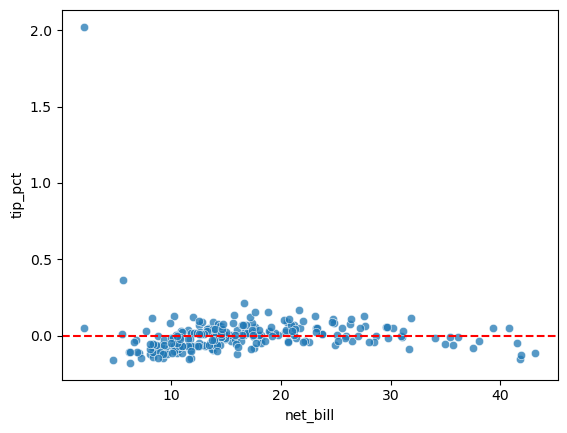

In [5]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data=tips).fit()
print(reg.summary())
tips['tip_pct']=reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.884
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00932
Time:                        20:20:47   Log-Likelihood:                -740.85
No. Observations:                 217   AIC:                             1486.
Df Residuals:                     215   BIC:                             1492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.1232 

C:\Users\WorkStation\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

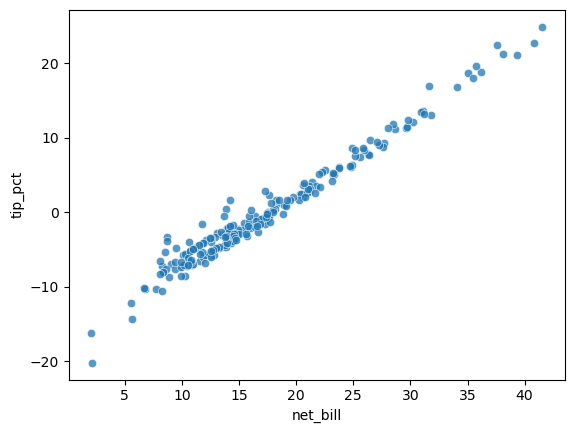

In [6]:
reg = smf.ols('net_bill ~  np.log(tip_pct+.1)', data = tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid


sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)

In [12]:
tips['tip_pct'] = np.exp(reg.fittedvalues)

tips[['tip_pct', 'net_bill']].corr().iloc[0,1]**2

0.014860918337544727

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.265
Model:                              OLS   Adj. R-squared:                  0.257
Method:                   Least Squares   F-statistic:                     31.79
Date:                  Thu, 08 Dec 2022   Prob (F-statistic):           2.05e-07
Time:                          20:25:51   Log-Likelihood:                -131.14
No. Observations:                    90   AIC:                             266.3
Df Residuals:                        88   BIC:                             271.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

C:\Users\WorkStation\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

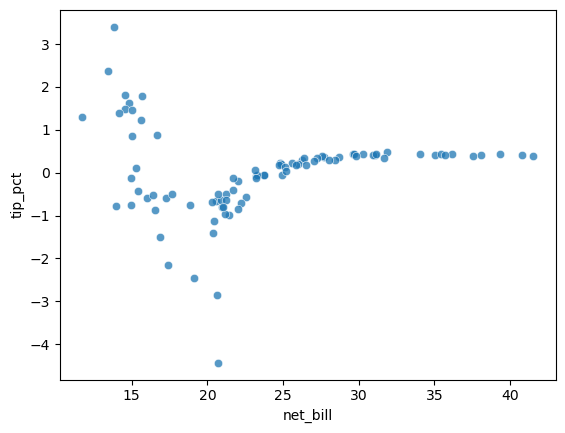

In [17]:
reg = smf.ols('np.log(tip_pct+.1) ~  np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())
tips['tip_pct'] = reg.resid


sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)

In [18]:
tips['tip_pct'] = np.exp(reg.fittedvalues)

tips[['tip_pct', 'net_bill']].corr().iloc[0,1]**2

0.9692971830867823